# One Hidden Layer Neural Network(Iris-Dataset)
    For multiclass classification, I took the Iris dataset.
    I just modify a line of code ie  A2_Layer=2(Output Layer) to A2_Layer=3.

## Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
Random_State=2020

## Import Dataset

In [34]:
def Import_Data():
    iris = datasets.load_iris()
    X = iris.data[:, 2:]  # we only take the first two features.
    df=pd.DataFrame(X)
    y = iris.target
    df=pd.concat([df,pd.DataFrame(y)],axis=1,ignore_index=True)
    df.columns=["A","B","y"]
    return df

In [35]:
df=Import_Data()
df.head()

,A,B,y
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


## Visualisation 

In [57]:
def Plot_Data(data):
    sns.scatterplot(x=data.A,y=data.B,hue=data.iloc[:,-1])
    plt.show()
    return 

In [58]:
def Plot_Compare(data):
    fig, ax=plt.subplots(ncols=2,figsize=(10,5))
#     Plot_Data(train_y_pred.drop("y",axis=1))
    sns.scatterplot(x=data.A,y=data.B,hue=data.y,ax=ax[0])
    plt.title("Predicted Data")
    sns.scatterplot(x=data.A,y=data.B,hue=data.y_hat,ax=ax[1])
    plt.show()
    return 

In [115]:
def Show_Loss_Graph(loss):
    keys=list(loss.keys())
    values=list(loss.values())
    plt.xlabel("n Epoch")
    plt.ylabel("Loss")
    print("Starting Loss : ",values[0])
    print("Ending Loss :",values[-1])
    sns.lineplot(x=keys,y=values)
    return 

In [36]:
Iris_Data=Import_Data()
Iris_Data.head()

,A,B,y
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


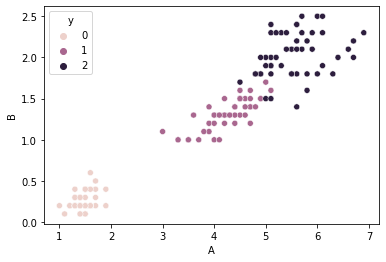

In [37]:
Plot_Data(Iris_Data)

## Train Test Split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(Iris_Data.iloc[:,:-1],
                                                    Iris_Data.iloc[:,-1], test_size=0.2, 
                                                    random_state=42)

## DataFrame To Store Results

In [59]:
Result_df=pd.DataFrame(columns=["Dimention of hidden layer","Learning Rate","Regularization","n_Epoch",
                                "Train_Accuracy","Test Accuracy","Comment"])

In [60]:
#To store result in the dataframe
def Save_Result(hidden_layer,Learning_Rate,Regularization,n_Epoch,Train_Accuracy,Test_Accuracy):
    global Result_df
    Remark=input("Please Enter Remark : ")
    result={"Dimention of hidden layer":hidden_layer,"Learning Rate":Learning_Rate,
            "Regularization":Regularization,"n_Epoch":n_Epoch,
                                "Train_Accuracy":Train_Accuracy,
                                "Test Accuracy":Test_Accuracy,"Comment":Remark}
    Result_df=Result_df.append(result,ignore_index=True)
    print("Data Saved")
    return True

## Calculate_Accuracy On dataset 

In [92]:
def Calculate_Accuracy(model_,data_X,data_y):
    X=data_X.copy()
    y=data_y.copy()
    y_hat=Predict_Function(model_,X)
    Accuracy=accuracy_score(y,y_hat)
    print("Accuracy : ",Accuracy)
    data=pd.concat([ X,y],axis=1,ignore_index=True)
    data["y_hat"]=y_hat
    data.columns=["A","B","y","y_hat"]
    return data,Accuracy

## Predicting results based on model

In [93]:
def Predict_Function(model,X):
    # 2 Layer NN and Softmax function at the output layer
    """
        model={W1,B1,W2,B2}
        X= input features
    """
    
    W1,B1,W2,B2=model["W1"],model["B1"],model["W2"],model["B2"]
    
    # Hidden Layer (1st Layer)
    Z1=np.dot(X,W1)+B1
    a1=np.tanh(Z1)

    # Hidden Layer (1st Layer)
    Z2=np.dot(a1,W2)+B2
    
    #output Layer -> Softmax
    exp_op=np.exp(Z2)
    
    #To calculate probabilities
    proba=exp_op/np.sum(exp_op,axis=1,keepdims=True)
#     print("np.argmax(proba) : ",np.argmax(proba))
    return np.argmax(proba,axis=1)
    

## Calculate loss on whole dataset

In [64]:
def Calculate_Loss_Function(model,X,y):
    # Function to calculate loss on whole dataset
    
    W1,B1,W2,B2=model["W1"],model["B1"],model["W2"],model["B2"]
    
    # Hidden Layer (1st Layer)
    Z1=np.dot(X,W1)+B1
    a1=np.tanh(Z1)
    
    # Hidden Layer (1st Layer)
    Z2=np.dot(a1,W2)+B2
    
    #output Layer -> Softmax
    exp_op=np.exp(Z2)
    
    #To calculate probabilities
    proba=exp_op/np.sum(exp_op,axis=1,keepdims=True)
    
    #Calculate Correct loss 
    log_proba=-np.log(proba[range(num_examples),y])
    loss=np.sum(log_proba)
    
    #
    loss+=(lambda_/2) *(np.sum(np.square(W1))+np.sum(np.square(W2)))
    loss/=num_examples
    return loss.values[0]

## Train Model

In [65]:
def Train_Model(NN_hidden_Layer,NN_Output_Layer,X,y,Epoch=1000,Print_Loss=False):
    
    np.random.seed(Random_State)
    # Save weights to return
    model={}
    
    # Intializing weights
    W1=np.random.randn(X.shape[1],NN_hidden_Layer)/np.sqrt(NN_hidden_Layer)
    B1=np.zeros((1,NN_hidden_Layer))
    W2=np.random.randn(NN_hidden_Layer,NN_Output_Layer)/np.sqrt(NN_Output_Layer)
    B2=np.zeros((1,NN_Output_Layer))

    ## Forword Propagation
    for i in range(Epoch):
        # Hidden Layer (1st Layer)
        Z1=np.dot(X,W1)+B1
        a1=np.tanh(Z1)

        # Hidden Layer (1st Layer)
        Z2=np.dot(a1,W2)+B2

        #output Layer -> Softmax
        exp_op=np.exp(Z2)

        #To calculate probabilities
        proba=exp_op/np.sum(exp_op,axis=1,keepdims=True)

        ## Back propagation
        dz2=proba
        
        #Calculate Correct loss 
        
        dz2[range(num_examples),y]-=1 #------------1 
        
        dW2=(1/num_examples)*(a1.T).dot(dz2)#------2
        
        assert (W2.shape==dW2.shape) ,"Shape of W2={} and dW2 ={} doesn't match".format(W2.shape,dW2.shape)
        
        dB2=(1/num_examples)*np.sum(dz2,axis=0,keepdims=True)
        
        assert (B2.shape==dB2.shape) ,"Shape of B2={} and dB2 ={} doesn't match".format(B2.shape,dB2.shape)
        
        dz1=dz2.dot(W2.T)*(1-a1**2) ## Derivative of tanh --> 1-tanh**2
        
        assert (Z1.shape==dz1.shape) ,"Shape of Z1={} and dz1 ={} doesn't match".format(Z1.shape,dz1.shape)
        
        dW1=(1/num_examples)*(X.T).dot(dz1)
        
        assert (W1.shape==dW1.shape) ,"Shape of W1={} and dW1 ={} doesn't match".format(W1.shape,dW1.shape)
        
        dB1=(1/num_examples)*np.sum(dz1,axis=0)
        
        # Regularization
        dW2+=lambda_*W2
        dW1+=lambda_*W1
        
        
        # Gradient Descent
        
        W1+=-lr*dW1
        B1+=-lr*dB1
        W2+=-lr*dW2
        B2+=-lr*dB2
        
        # set values to the dict model
        
        model={"W1":W1,"B1":B1,"W2":W2,"B2":B2}
        
        # Print Loss 
        if Print_Loss and i%1000==0:
            loss=Calculate_Loss_Function(model,X,y)

            print("Loss after %i epoch is %f"%(i,loss))
            loss_dict[i]=loss
    
    loss=Calculate_Loss_Function(model,X,y)
    
    print("Loss after %i epoch is %f"%(i,loss))
    loss_dict[i]=loss
    
    return model,proba

        
        
        


## Main Function
### Parameters and Result

In [94]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=2
NN_Hidden_A2=3

lr=0.01
lambda_=0.0001
Epoch=2000


In [97]:
def Main():

    model,proba=Train_Model(NN_Hidden_A1,NN_Hidden_A2,X_train,y_train,Epoch,True)
    print("Loss Graph")
    Show_Loss_Graph(loss_dict)
    print("Training Data")
    train_y_pred,train_acc=Calculate_Accuracy(model,X_train,y_train)
    print("Testing Data")
    test_y_pred,test_acc=Calculate_Accuracy(model,X_test,y_test)
    
    Plot_Compare(train_y_pred)
    Plot_Compare(test_y_pred)

    Save_Result(NN_Hidden_A1,lr,lambda_,Epoch,train_acc,test_acc)

Loss after 0 epoch is 1.093045
Loss after 1000 epoch is 0.666966
Loss after 1999 epoch is 0.495757
Loss Graph
Starting Loss :  1.0930454561708594
Ending Loss : 0.495756865036246
Training Data
Accuracy :  0.8833333333333333
Testing Data
Accuracy :  0.8666666666666667


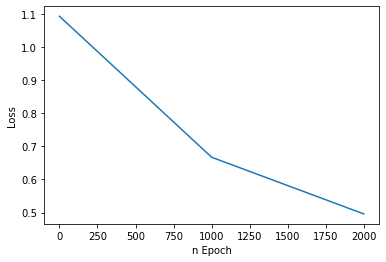

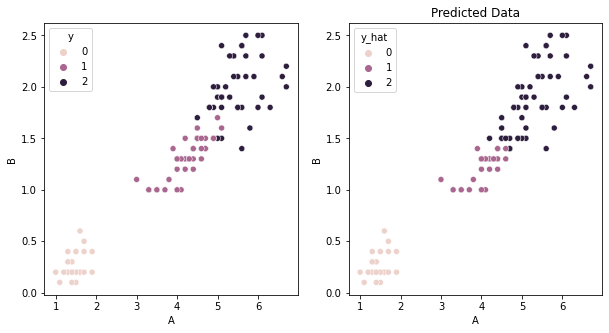

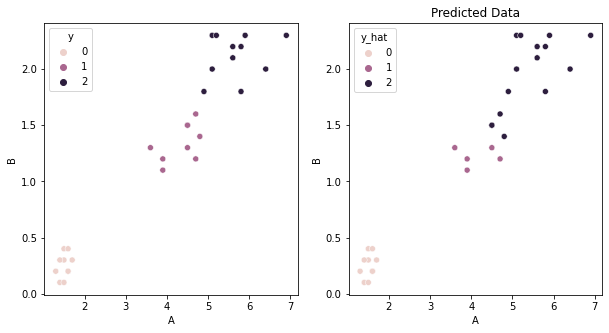

Please Enter Remark : Testing
Data Saved


In [98]:
Main()

### Parameters and Result

Loss after 0 epoch is 1.086818
Loss after 1000 epoch is 0.277507
Loss after 2000 epoch is 0.159884
Loss after 3000 epoch is 0.136677
Loss after 4000 epoch is 0.133441
Loss after 5000 epoch is 0.131812
Loss after 6000 epoch is 0.130863
Loss after 7000 epoch is 0.130265
Loss after 8000 epoch is 0.129863
Loss after 9000 epoch is 0.129581
Loss after 9999 epoch is 0.129377
Loss Graph
Starting Loss :  1.0868181240912456
Ending Loss : 0.12937692093366282
Training Data
Accuracy :  0.9583333333333334
Testing Data
Accuracy :  1.0


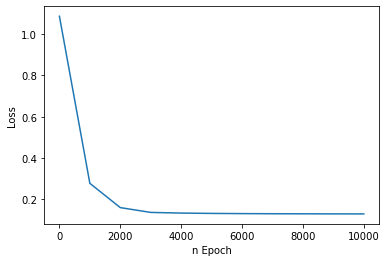

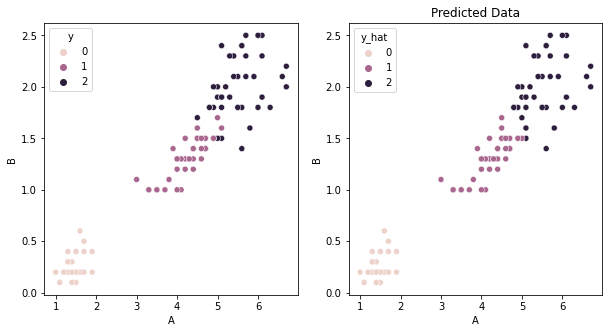

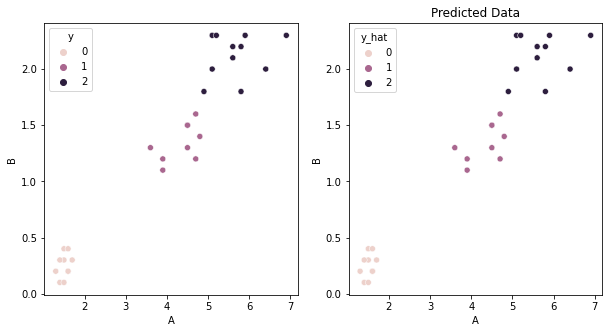

Please Enter Remark : Increase Learning Rate and Epochs
Data Saved


In [101]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=2
NN_Hidden_A2=3

lr=0.1
lambda_=0.01
Epoch=10000

Main()

### Parameters and Result

Loss after 0 epoch is 1.174914
Loss after 1000 epoch is 0.157673
Loss after 2000 epoch is 0.115944
Loss after 3000 epoch is 0.100096
Loss after 4000 epoch is 0.092488
Loss after 5000 epoch is 0.088623
Loss after 6000 epoch is 0.086566
Loss after 7000 epoch is 0.085462
Loss after 8000 epoch is 0.084928
Loss after 9000 epoch is 0.084562
Loss after 9999 epoch is 0.084111
Loss Graph
Starting Loss :  1.1749139601715837
Ending Loss : 0.0841109215041664
Training Data
Accuracy :  0.95
Testing Data
Accuracy :  1.0


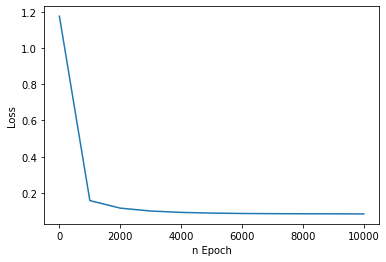

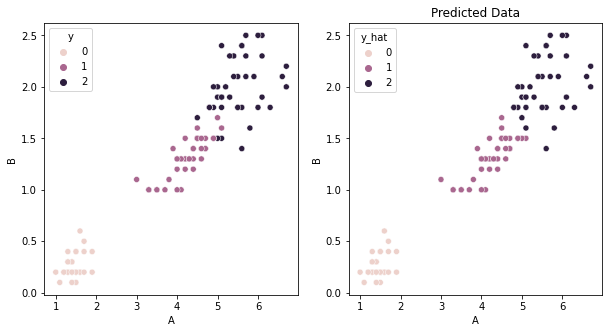

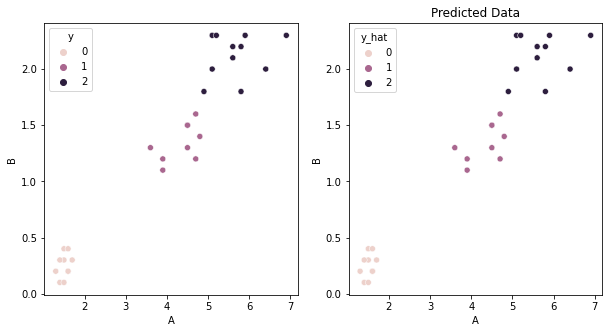

Please Enter Remark : Lambda=0 and Epoch=10000
Data Saved


In [107]:
loss_dict={}
num_examples=len(train)
NN_Hidden_A1=8
NN_Hidden_A2=3

lr=0.1
lambda_=0.00
Epoch=10000

Main()

# Final Result

In [117]:
Result_df

,Dimention of hidden layer,Learning Rate,Regularization,n_Epoch,Train_Accuracy,Test Accuracy,Comment
0,2,0.01,0.0001,2000,0.883333,0.866667,Testing
1,2,0.10,0.0100,10000,0.958333,1.000000,Increase Learning Rate and Epochs
2,8,0.10,0.0000,10000,0.950000,1.000000,Lambda=0 and Epoch=10000
